# Gráficas

In [1]:
using LightGraphs
using GLM
using DataFrames
using GraphPlot
using Graphs
using DelimitedFiles
using Plots, LaTeXStrings
pyplot()

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/LightGraphs/Xm08G.ji for LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/GraphPlot/bUwXr.ji for GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/LaTeXStrings/H4HGh.ji for LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


Plots.PyPlotBackend()

In [2]:
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas_art.csv", ',', String)
lista_aerolineas = info_aerolineas[:, 2]

30-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "MU"           
 "CZ"           
 "AF"           
 "CA"           
 "KE"           
 "HU"           
 "CX"           
 "GS"           
 ⋮              
 "SC"           
 "HO"           
 "JD"           
 "KA"           
 "8L"           
 "MI"           
 "FD"           
 "PN"           
 "EU"           
 "NS"           
 "KY"           
 "BX"           

In [3]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR WUH PARA CADA RED

num_vuelos_directos = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    archivo_rw_MX_inf_num = string(airline_code, "_cantidad_MX.csv")
   
    wuh_mx = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_MX_inf_num", ',', Int64)
    
    push!(num_vuelos_directos, wuh_mx)
    
end

return num_vuelos_directos

29-element Array{Any,1}:
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 ⋮  
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]

In [4]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS PARA C/RED

num_vuelos_infectados = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    archivo_rw_inf_MX_num = string(airline_code, "_cantidad_inf_MX.csv")
   
    wuh_inf = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_inf_MX_num", ',', Int64)
    
    push!(num_vuelos_infectados, wuh_inf)
    
end

return num_vuelos_infectados

29-element Array{Any,1}:
 [894]
 [936]
 [893]
 [744]
 [0]  
 [0]  
 [577]
 [566]
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 ⋮    
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  

In [5]:
"""
    import_matrix(arch::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function import_matrix(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end


import_matrix

In [6]:
#gl=import_matrix("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/BX_matriz_du.csv")

In [6]:
"""
    airport_names(arch::AbstractString)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function airport_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',', String)
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end


airport_names

In [8]:
#an = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/global_matriz_du.csv")

In [7]:
"""
    my_graph(M::Array{Int64,2}, airline_code::String)

Función que hace el grafo de la red aérea dirigida.
"""
function my_graph(M::Array{Int64,2}, airline_code::String)

    grafo = DiGraph(M)

end


my_graph

In [87]:
#ggl = my_graph(gl, "global")

{15, 28} directed simple Int64 graph

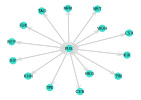

In [92]:
## DIBUJO DEL GRAFO CON NOMBRES DE AEROPUERTOS EN LOS NODOS
#nodelabel = collect(an)
#gplot(ggl, nodelabel=nodelabel)

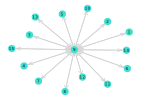

In [120]:
## DIBUJO DEL GRAFO CON NÚMERO DE VÉRTICE EN LOS NODOS
#nodelabel = collect(1:nv(ggl))
#gplot(ggl, nodelabel=nodelabel)

In [8]:
"""

    busca_WUH(list_aerop::Array{String, 1})

La función busca_WUH tiene como parámetros:
list_aerop, lista de aeropuertos de la aerolínea
La función lee la lista de aeropuertos de la aerolínea, busca el índice del aeropuerto WUH.
Regresa el índice del aeropuerto WUH.
"""
function busca_WUH(list_aerop::Array{String, 1})

    i = 1
    while list_aerop[i] != "WUH"
        i +=1
    end
    i
end

busca_WUH

In [99]:
#busca_WUH(an)

14

In [100]:
#dis = dijkstra_shortest_paths(ggl, 14)

LightGraphs.DijkstraState{Int64,Int64}([9, 9, 9, 9, 9, 9, 9, 9, 14, 9, 9, 9, 9, 0, 9], [2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2], Array{Int64,1}[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []], UInt64[0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001], Int64[])

In [122]:
#dis.dists

15-element Array{Int64,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 1
 2
 2
 2
 2
 0
 2

In [9]:
"""

    busca_aeropuerto(list_aerop::Array{String, 1}, aeropuerto::String)

La función busca_aeropuerto tiene como parámetros:
list_aerop, lista de aeropuertos de la aerolínea
aeropuerto, nombre del aeropuerto que se quiere buscar
La función lee la lista de aeropuertos de la aerolínea, busca el índice del aeropuerto que se desea.
Regresa el índice de dicho aeropuerto.
"""
function busca_aeropuerto(list_aerop::Array{String, 1}, aeropuerto::String)

    i = 1
    while list_aerop[i] != aeropuerto
        i +=1
    end
    i
end

busca_aeropuerto

## Histogramas caminatas infectadas

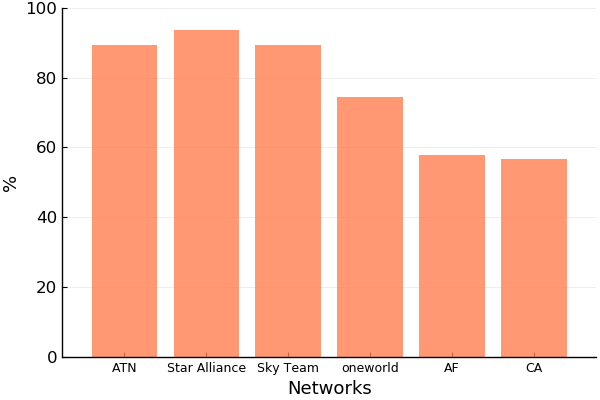

In [14]:
#Airlines porcentaje_WUH_inf_MX

red_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]

graph = Plots.bar(red_inf, porcentaje_inf, 
    fillcolor = :coral, 
    alpha = 0.8,
    grid = :y,
    linealpha = 0,
    #title = "Infected random walks to Mexico after a year",
    xlabel = "Networks",
    ylabel = "%",
    xtickfont = font(9, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    legend = :none,
    ylims = (0,100)) 

## Cobertura de cada red

In [15]:
#LEO TODAS LAS COBERTURAS DEL VÉRTICE/AEROPUERTO INICIAL WUH

coberturas_wuh = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    archivo_cobertura_vertex = string(airline_code, "_vertex_coverage.csv")
   
    cobertura = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/cobertura/$archivo_cobertura_vertex", ',', Float64)
    
    push!(coberturas_wuh, cobertura[])
    
end

return coberturas_wuh

29-element Array{Any,1}:
 418.34 
 295.176
 243.242
 133.974
 148.012
 116.66 
 103.28 
 139.194
  99.903
  62.247
  93.714
  86.36 
  82.606
   ⋮    
  58.409
  52.773
  48.333
  46.997
  44.809
  44.999
  37.0  
  34.517
  31.98 
  28.982
  21.999
  15.0  

In [16]:
coberturas_wuh = convert(Array{Float64,1}, coberturas_wuh);

In [17]:
porcentaje_cobert = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/Articulo/Random_walks/Tabla_riesgo-mex/Porcentaje_coberturas.csv", '\t', Any)

30×3 Array{Any,2}:
    "Cobertura prom"  "Airlines"         "%Cobertura"
 418.34               "global"         13.6178       
 295.176              "Star Alliance"   9.60859      
 243.242              "Sky Team"        7.91803      
 133.974              "oneworld"        4.36113      
 148.012              "MU"              4.8181       
 116.66               "CZ"              3.79753      
 103.28               "AF"              3.36198      
 139.194              "CA"              4.53105      
  99.903              "KE"              3.25205      
  62.247              "HU"              2.02627      
  93.714              "CX"              3.05059      
  86.36               "GS"              2.8112       
   ⋮                                                 
  58.409              "SC"              1.90133      
  52.773              "HO"              1.71787      
  48.333              "JD"              1.57334      
  46.997              "KA"              1.52985      
  44.809 

In [18]:
porc = porcentaje_cobert[:,3][2:end];
porc = convert(Array{Float64,1}, porc);

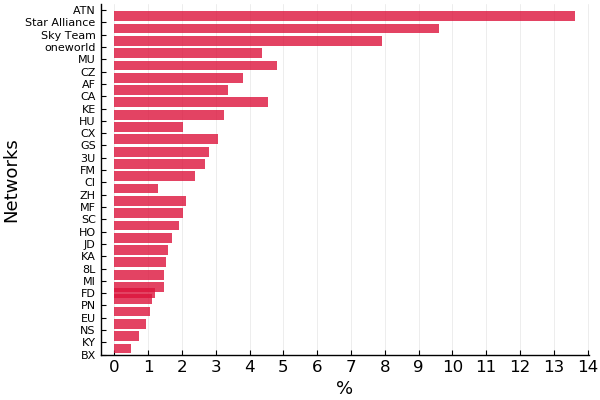

In [64]:
# COBERTURA DE CADA RED

aerolinea_red = ["ATN", "Star Alliance", "Sky Team", "oneworld", "MU", "CZ", "AF", "CA", "KE", 
    "HU", "CX", "GS", "3U", "FM", "CI", "ZH", "MF", "SC", "HO", "JD", "KA", "8L", "MI", "FD", 
    "FD", "PN", "EU", "NS", "KY", "BX"] #lista_aerolineas[2:end]
#@show aerolinea_red
cobertura_red = porc #coberturas_wuh
#@show cobertura_red

graph = bar(aerolinea_red, cobertura_red,   
    bar_width = 0.8,
    #nbins = 0:1:30,
    orientation = :h,
    fillcolor = :crimson, 
    alpha = 0.8,
    grid = :x,
    #markersize = 3, 
    linealpha = 0,
    #title = "ATN Coverage",
    xlabel = "%",
    ylabel = "Networks",
    xticks = 0:1:15,
    yticks = :all,
    xtickfont = font(12, "Courier"),
    #ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    #align = "center",
    #tickfonthalign = :hcenter,
    #tickfontvalign = :center,
    yflip = true,
    #tick_direction = :out,
    legend = :none,
    xrotation = 0,
    #xlims = (-10,250), #obtener límites
    ylims = (0,25)) #obtener límites
#Plots.histogram(..., nbins = -10:0.1:10)

## Histograma por tiempos 
## ATN

In [36]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS en tiempo 10

cantidad_infectados_t = []

for k = 2 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

10-element Array{Int64,1}:
  85
 167
 260
 350
 442
 531
 617
 714
 806
 894

In [37]:
#SACO PORCENTAJE
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  8.5
 16.7
 26.0
 35.0
 44.2
 53.1
 61.7
 71.4
 80.6
 89.4

In [38]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
#xx = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10"]
xx = collect(100:100:1000)
porcent_cant_inf2 = pushfirst!(porcent_cant_inf, 0)
xx2 = pushfirst!(xx, 0)


#scatter!(xx2, porcent_cant_inf2, 
    #line=(:dot, 4),
    #markersize = 5,
    #markercolor = :dodgerblue,
    #markerstrokealpha = 0,
    #markerstrokewidth = 0,
    ##fillcolor = :coral, 
    #alpha = 0.8,
    ##grid = ,
    ##markersize = 3, 
    ##linealpha = 0,
    #title = "Mexican infected walks over time",
    #xlabel = L"t",
    #ylabel = "%",
    ##legend = :false,
    ##xlims = (-10,250), #obtener límites
    #) #obtener límites


11-element Array{Int64,1}:
    0
  100
  200
  300
  400
  500
  600
  700
  800
  900
 1000

## Histograma por tiempos 

In [39]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 3
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t;

In [40]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  9.1
 18.5
 28.1
 37.8
 47.5
 56.7
 65.8
 75.1
 84.1
 93.6

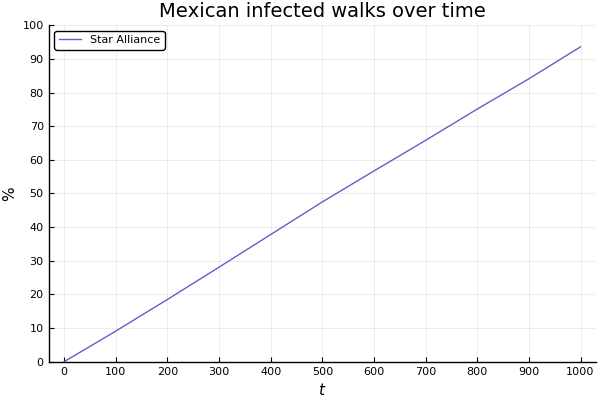

In [41]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = collect(100:100:1000)
porcent_cant_inf3 = pushfirst!(porcent_cant_inf, 0)
xx3 = pushfirst!(xx, 0)

graph2 = Plots.plot(xx3, porcent_cant_inf3, 
    legend =:true,
    linecolor=:SlateBlue,
    label = "Star Alliance",
    yticks = 0:10:100,
    xticks = 0:100:1000,
    title = "Mexican infected walks over time",
    xlabel = L"t",
    ylabel = "%",
    ylims = (0,100))



## Histograma por tiempos 

In [42]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 4 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

10-element Array{Int64,1}:
  92
 182
 266
 360
 448
 535
 626
 717
 803
 893

In [43]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  9.2
 18.2
 26.6
 36.0
 44.8
 53.5
 62.6
 71.7
 80.3
 89.3

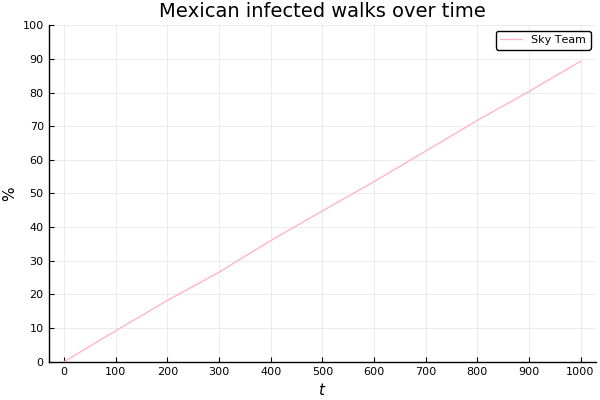

In [44]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = collect(100:100:1000)
porcent_cant_inf4 = pushfirst!(porcent_cant_inf, 0)
xx4 = pushfirst!(xx, 0)

graph4 = Plots.plot(xx4, porcent_cant_inf4, 
    legend =:true,
    linecolor=:LightPink,
    label = "Sky Team",
    yticks = 0:10:100,
    xticks = 0:100:1000,
    title = "Mexican infected walks over time",
    xlabel = L"t",
    ylabel = "%",
    ylims = (0,100))



## Histograma por tiempos 

In [45]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 5 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t;

In [46]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf);
    

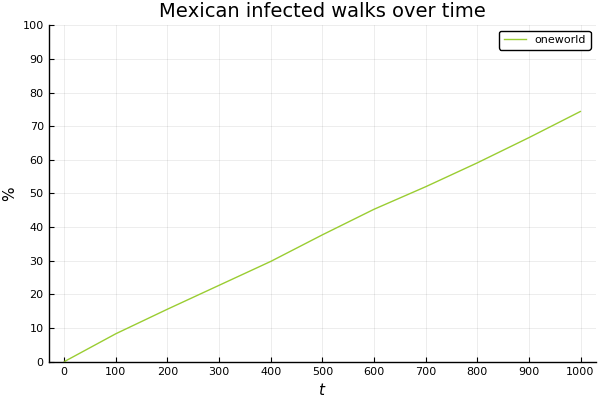

In [47]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = collect(100:100:1000)
porcent_cant_inf5 = pushfirst!(porcent_cant_inf, 0)
xx5 = pushfirst!(xx, 0)

graph5 = Plots.plot(xx5, porcent_cant_inf5, 
    legend =:true,
    linecolor=:YellowGreen,
    label = "oneworld",
    yticks = 0:10:100,
    xticks = 0:100:1000,
    title = "Mexican infected walks over time",
    xlabel = L"t",
    ylabel = "%",
    ylims = (0,100))



## Histograma por tiempos 

In [48]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 8 
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t;

In [49]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  6.1
 12.3
 18.0
 22.4
 28.4
 34.2
 39.9
 46.3
 51.4
 57.7

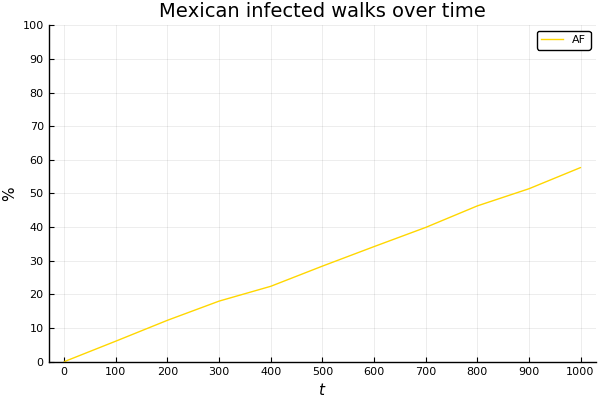

In [50]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = collect(100:100:1000)
porcent_cant_inf8 = pushfirst!(porcent_cant_inf, 0)
xx8 = pushfirst!(xx, 0)

graph8 = Plots.plot(xx8, porcent_cant_inf8, 
    legend =:true,
    linecolor=:Gold,
    label = "AF",
    yticks = 0:10:100,
    xticks = 0:100:1000,
    title = "Mexican infected walks over time",
    xlabel = L"t",
    ylabel = "%",
    ylims = (0,100))



## Histograma por tiempos 

In [51]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 9
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t;

In [52]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  5.8
 11.9
 16.5
 22.3
 27.8
 32.8
 38.7
 44.2
 50.5
 56.6

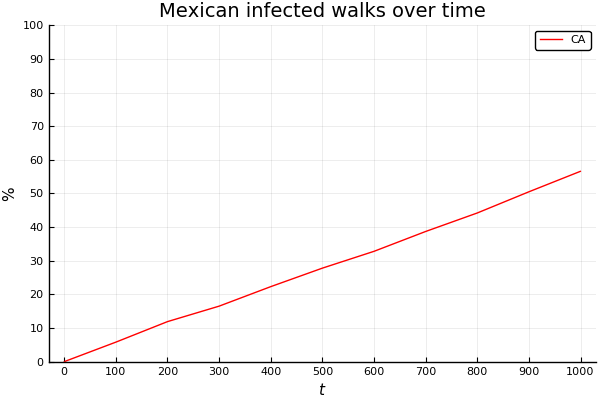

In [53]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = collect(100:100:1000)
porcent_cant_inf9 = pushfirst!(porcent_cant_inf, 0)
xx9 = pushfirst!(xx, 0)

graph9 = Plots.plot(xx9, porcent_cant_inf9, 
    legend =:true,
    linecolor=:Red,
    label = "CA",
    yticks = 0:10:100,
    xticks = 0:100:1000,
    title = "Mexican infected walks over time",
    xlabel = L"t",
    ylabel = "%",
    ylims = (0,100))



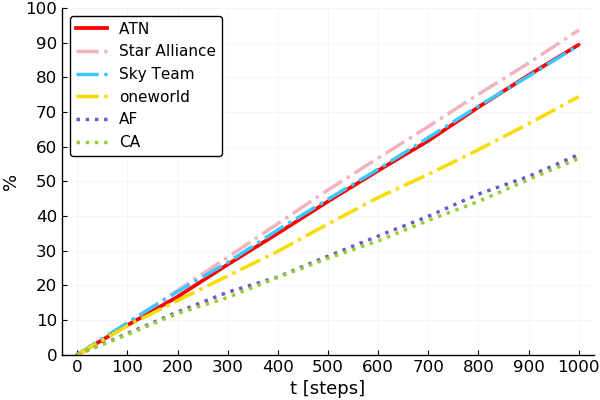

In [94]:
graph = Plots.plot(xx2, porcent_cant_inf2, 
    line =:solid,
    legend =:true, 
    label = "ATN",
    linecolor =:Red,
    linewidth = 2.7,
    yticks = 0:10:100,
    xticks = 0:100:1000,
    xtickfont = font(12, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    legendfontsize = 11,
    #title = "Mexican infected walks over time",
    xlabel = "t [steps]",
    ylabel = "%",
    ylims = (0,100),
    gridalpha = 0.05)
Plots.plot!(xx3, porcent_cant_inf3, 
    line =:dashdot,
    legend =:true,
    linecolor=:"#f2b3bd",
    label = "Star Alliance",
    linewidth = 2.5)
    #yticks = 0:10:100,
    #xticks = 0:100:1000,
    #title = "Mexican infected walks over time",
    #xlabel = L"t",
    #ylabel = "%",
    #ylims = (0,100))
Plots.plot!(xx4, porcent_cant_inf4, 
    line =:dashdot,
    legend =:true,
    linecolor=:"#3bc7ff",
    label = "Sky Team",
    linewidth = 2.5)
    #yticks = 0:10:100,
    #xticks = 0:100:1000,
    #title = "Mexican infected walks over time",
    #xlabel = L"t",
    #ylabel = "%",
    #ylims = (0,100))
Plots.plot!(xx5, porcent_cant_inf5, 
    line =:dashdot,
    legend =:true,
    linecolor=:"#f8dc00",
    label = "oneworld",
    linewidth = 2.5)
    #yticks = 0:10:100,
    #xticks = 0:100:1000,
    #title = "Mexican infected walks over time",
    #xlabel = L"t",
    #ylabel = "%",
    #ylims = (0,100))
Plots.plot!(xx8, porcent_cant_inf8, 
    line =:dot,
    legend =:true,
    linecolor=:SlateBlue,
    label = "AF",
    linewidth = 2.5)
    #yticks = 0:10:100,
    #xticks = 0:100:1000,
    #title = "Mexican infected walks over time",
    #xlabel = L"t",
    #ylabel = "%",
    #ylims = (0,100))
Plots.plot!(xx9, porcent_cant_inf9, 
    line =:dot,
    legend =:true,
    linecolor=:YellowGreen,
    label = "CA",
    linewidth = 2.5)
    #yticks = 0:10:100,
    #xticks = 0:100:1000,
    #title = "Mexican infected walks over time",
    #xlabel = L"t",
    #ylabel = "%",
    #ylims = (0,100),
    #gridalpha = 0.05) #ffc000

In [364]:
pos = []
for k in [2,3,4,5,8,9]
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    archivo_rw_MX_pos = string(airline_code, "_posiciones_MX.csv")
   
    pos_mx = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_MX_pos", ',', Int64)
    #@show pos_mx
    
    push!(pos, sum(pos_mx)/length(pos_mx))
    end
    
    
return pos

6-element Array{Any,1}:
 210.22595078299776
 152.43696581196582
 131.59686450167973
  93.16801075268818
 228.6204506065858 
 430.6713780918728 

In [365]:
sum(pos)/6

207.7866034246317

In [ ]:
## Histograma por tiempos 

#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 5 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = collect(100:100:1000)
porcent_cant_inf2 = pushfirst!(porcent_cant_inf, 0)
xx2 = pushfirst!(xx, 0)

graph2 = Plots.plot(xx2, porcent_cant_inf2, 
    legend =:true,
    linecolor=:Violet,
    label = "oneworld",
    yticks = 0:10:100,
    xticks = 0:100:1000,
    title = "Mexican infected walks over time",
    xlabel = L"t",
    ylabel = "%",
    ylims = (0,100))


In [ ]:
function 
    
    cantidad_infectados_t = []

for k = 3 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

## Coeficiente de Difusión

$$<x^2> = \frac{1}{N} \sum_{i=1}^{N} |x^{(i)} (t) - x_0|^2$$

$$ D = \frac{<x^2>}{2t}$$


In [170]:
#DMS

1001-element Array{Float64,1}:
    0.0                 
    2.0337423312883436  
 -120.18181818181819    
   -4.528735632183908   
   -2.602919708029197   
   -1.8767123287671232  
   -1.5518763796909492  
   -1.3579009433962264  
   -1.129365469749139   
   -1.0649789029535865  
   -0.9541928333949021  
   -0.9060446780551905  
   -0.821354628808045   
    ⋮                   
   -0.01483329825932718 
   -0.014584027846603417
   -0.014728296090055925
   -0.014368737655144301
   -0.01453688566312751 
   -0.014929033994885063
   -0.01481539031591026 
   -0.014728841842567965
   -0.01472895033489798 
   -0.014749912859028252
   -0.0148125           
   -0.015303103732268529

In [177]:
## CÓMO CONVERTIR A DATA FRAME
#x = collect(0:1:1000)
#y = DMS
#df = hcat(x,y)
#df = convert(DataFrame, df)

,x1,x2
,Float64,Float64
1,0.0,0.0
2,1.0,2.03374
3,2.0,-120.182
4,3.0,-4.52874
5,4.0,-2.60292
6,5.0,-1.87671
7,6.0,-1.55188
8,7.0,-1.3579
9,8.0,-1.12937


In [178]:
## Ajustamos una recta 
#ajuste = lm(@formula(x2 ~ x1), df)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
──────────────────────────────────────────────────────────
                 Estimate    Std.Error   t value  Pr(>|t|)
──────────────────────────────────────────────────────────
(Intercept)  -0.674866     0.239679     -2.8157     0.0050
x1            0.000970579  0.000415033   2.33856    0.0196
──────────────────────────────────────────────────────────

In [179]:
## COEFICIENTES DE LA RECTA, 2 ELEMENTOS: 1)PENDIENTE M. 2) ORDENADA AL ORIGEN B 
#coeficientes_df = round.(coef(ajuste), digits=5)

2-element Array{Float64,1}:
 -0.67487
  0.00097

In [180]:
## R^2
#r_2 = round.(r2(ajuste), digits=5)

0.00544

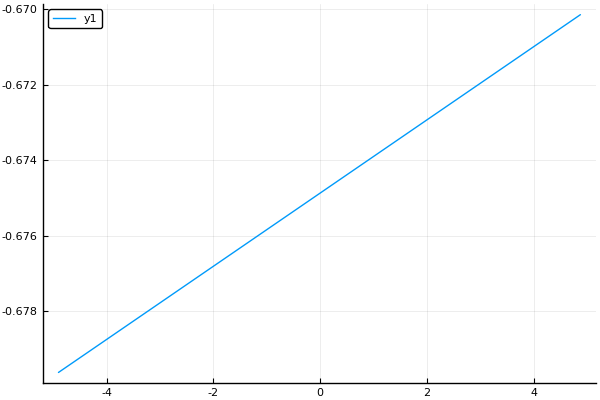

In [181]:
##PLOT DE LA RECTA
#my_equation(x) = coeficientes_df[2]*(x) + coeficientes_df[1]
#Plots.plot(my_equation)

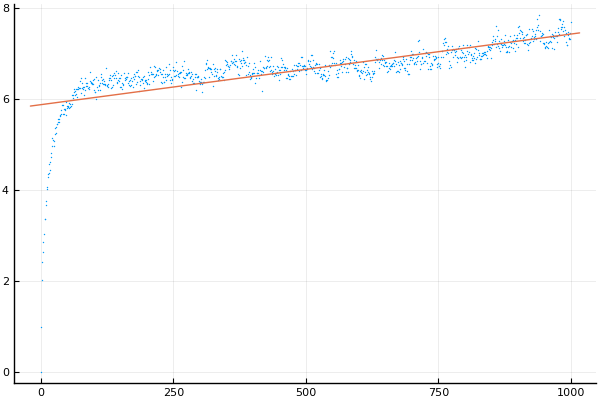

In [213]:
#Plots.scatter(x,y, markersize=1, markerstrokewidth=0, legend=false)
#Plots.plot!(my_equation)